# data exploration of tags in posts set


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 



In [5]:
df = pd.read_csv('data/stats/csv/posts.csv')

In [6]:
df.describe()

,Id,PostTypeId,AcceptedAnswerId,Score,ViewCount,OwnerUserId,AnswerCount,CommentCount,FavoriteCount,LastEditorUserId,ParentId
count,309024.000000,309024.000000,50868.000000,309024.000000,1.539880e+05,304959.000000,153988.000000,309024.000000,51730.000000,151495.000000,152421.000000
mean,223721.043301,1.522950,213084.196784,3.071367,1.708943e+03,81947.778918,0.989824,1.840757,3.365165,55005.416311,196034.960275
std,136161.281514,0.571383,134577.622161,8.981665,9.982262e+03,78488.775725,1.188176,2.660113,13.245714,68549.625936,135675.412503
min,1.000000,1.000000,5.000000,-53.000000,2.000000e+00,-1.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
25%,101113.500000,1.000000,92121.750000,1.000000,5.900000e+01,12359.000000,0.000000,0.000000,1.000000,6633.000000,71727.000000
50%,223576.000000,2.000000,207521.500000,1.000000,1.980000e+02,55227.000000,1.000000,1.000000,1.000000,22228.000000,183006.000000
75%,345007.250000,2.000000,330280.500000,3.000000,8.290000e+02,136200.500000,1.000000,3.000000,2.000000,87080.000000,311384.000000
max,452064.000000,7.000000,452044.000000,1374.000000,1.071331e+06,275278.000000,150.000000,66.000000,1398.000000,275278.000000,452057.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309024 entries, 0 to 309023
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     309024 non-null  int64  
 1   PostTypeId             309024 non-null  int64  
 2   AcceptedAnswerId       50868 non-null   float64
 3   CreationDate           309024 non-null  object 
 4   Score                  309024 non-null  int64  
 5   ViewCount              153988 non-null  float64
 6   OwnerUserId            304959 non-null  float64
 7   LastActivityDate       309024 non-null  object 
 8   Tags                   153988 non-null  object 
 9   AnswerCount            153988 non-null  float64
 10  CommentCount           309024 non-null  int64  
 11  FavoriteCount          51730 non-null   float64
 12  LastEditorDisplayName  3223 non-null    object 
 13  LastEditDate           154545 non-null  object 
 14  LastEditorUserId       151495 non-nu

In [14]:
df.Score.describe()

count    309024.000000
mean          3.071367
std           8.981665
min         -53.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        1374.000000
Name: Score, dtype: float64

In [27]:
df.head().Tags

0               <bayesian><prior><elicitation>
1        <distributions><normality-assumption>
2                      <software><open-source>
3    <distributions><statistical-significance>
4                                          NaN
Name: Tags, dtype: object

In [31]:
df.count()

Id                       309024
PostTypeId               309024
AcceptedAnswerId          50868
CreationDate             309024
Score                    309024
ViewCount                153988
OwnerUserId              304959
LastActivityDate         309024
Tags                     153988
AnswerCount              153988
CommentCount             309024
FavoriteCount             51730
LastEditorDisplayName      3223
LastEditDate             154545
LastEditorUserId         151495
OwnerDisplayName           7106
CommunityOwnedDate         4756
ClosedDate                10401
ParentId                 152421
dtype: int64

In [34]:
df.isna().sum()/(len(df))*100

Id                        0.000000
PostTypeId                0.000000
AcceptedAnswerId         83.539143
CreationDate              0.000000
Score                     0.000000
ViewCount                50.169566
OwnerUserId               1.315432
LastActivityDate          0.000000
Tags                     50.169566
AnswerCount              50.169566
CommentCount              0.000000
FavoriteCount            83.260200
LastEditorDisplayName    98.957039
LastEditDate             49.989321
LastEditorUserId         50.976300
OwnerDisplayName         97.700502
CommunityOwnedDate       98.460961
ClosedDate               96.634242
ParentId                 50.676646
dtype: float64

In [44]:
tags_nan_filter = (df.Tags.isna() != True)

In [47]:
dftags = df[tags_nan_filter]

In [48]:
dftags.isna().sum()/(len(dftags))*100

Id                         0.000000
PostTypeId                 0.000000
AcceptedAnswerId          66.966257
CreationDate               0.000000
Score                      0.000000
ViewCount                  0.000000
OwnerUserId                1.435826
LastActivityDate           0.000000
Tags                       0.000000
AnswerCount                0.000000
CommentCount               0.000000
FavoriteCount             66.406473
LastEditorDisplayName     98.312206
LastEditDate              39.429046
LastEditorUserId          41.041510
OwnerDisplayName          97.212120
CommunityOwnedDate        99.399953
ClosedDate                93.245578
ParentId                 100.000000
dtype: float64

In [50]:
dftags1 = dftags[:1000]

In [52]:
dftags1.Tags

0                          <bayesian><prior><elicitation>
1                   <distributions><normality-assumption>
2                                 <software><open-source>
3               <distributions><statistical-significance>
5                        <machine-learning><pac-learning>
                              ...                        
3839    <time-series><confidence-interval><non-indepen...
3842                                        <time-series>
3845                <distributions><chi-squared><fitting>
3851             <data-visualization><contingency-tables>
3854                <multiple-comparisons><meta-analysis>
Name: Tags, Length: 1000, dtype: object

In [56]:
import re

str1 = '<distributions><normality-assumption>'
pattern = '\<([^\>]*)\>'
tags1  = re.findall(pattern=pattern, string=str1)


In [79]:
dftags1 = dftags1[['Id','Tags']]

In [80]:
dftags1['tagslist']=dftags1.Tags.str.findall(pattern)

In [81]:
dftags1

,Id,Tags,tagslist
0,1,<bayesian><prior><elicitation>,"[bayesian, prior, elicitation]"
1,2,<distributions><normality-assumption>,"[distributions, normality-assumption]"
2,3,<software><open-source>,"[software, open-source]"
3,4,<distributions><statistical-significance>,"[distributions, statistical-significance]"
5,6,<machine-learning><pac-learning>,"[machine-learning, pac-learning]"
...,...,...,...
3839,4196,<time-series><confidence-interval><non-indepen...,"[time-series, confidence-interval, non-indepen..."
3842,4200,<time-series>,[time-series]
3845,4203,<distributions><chi-squared><fitting>,"[distributions, chi-squared, fitting]"
3851,4211,<data-visualization><contingency-tables>,"[data-visualization, contingency-tables]"


In [85]:
dftags2 = dftags1[['Id','tagslist']].explode('tagslist')

In [93]:
dftags2.tagslist.nunique() # number of unique tags

422

In [101]:
dftags2_counts = dftags2.tagslist.value_counts()  # calue counts for each tag 

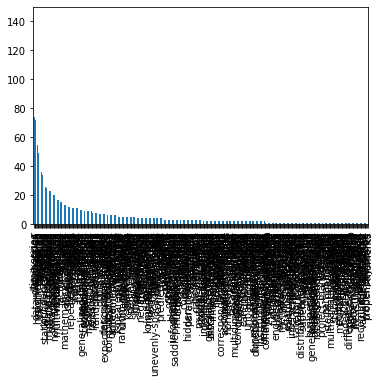

In [100]:
dftags2.tagslist.value_counts().plot.bar()

In [102]:
dftags2_counts.describe()

count    422.000000
mean       6.066351
std       11.687757
min        1.000000
25%        1.000000
50%        3.000000
75%        5.750000
max      143.000000
Name: tagslist, dtype: float64

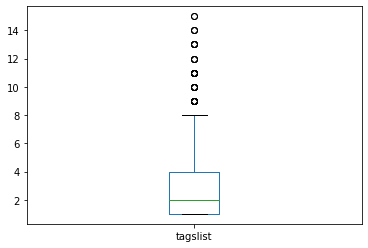

In [108]:
dftags2_counts[dftags2_counts <16].plot.box()

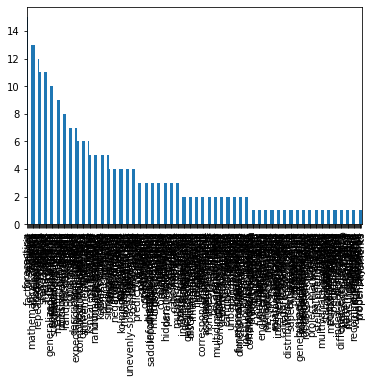

In [109]:
dftags2_counts[dftags2_counts <16].plot.bar()